# Lectura 4 Modelo Logístico en Tiempo Discreto
### Taller de herramientas y problemas en ingeniería industrial
### g.a.b.

# Nonlinear Models
ome simply defined recurrence relations can have very
complex (chaotic) behaviors, and they are a part of the field of
mathematics known as nonlinear analysis.

## Logistic difference equation
As a populationincreases, fixed resources must be shared between more and more individuals. A reasonable assumption is that as the population
increases, the growth rate declines because of some combination of
increased death and decreases of birth. Further there is probably
some population level which cannot be exceeded called ${carrying\ 
capacity}$. If a population were near the carrying capacity, its
growth rate would be zero. If the population were small, the growth
rate would be at its largest.


The growth rate
function $r(x)$ should pass through $(0,R$) and $(K,0)$, where $R$ is the
intrinsic growth rate and $K$ is the carrying capacity. The growth
rate function for the logistic model is found using the point-slope
equation for a line trough  $(0,R$) and $(K,0)$, which is

$r(x)-R=-\frac{R}{K}(x-0)$

solving for $r(x)$ yields

$r(x)=R-\frac{Rx}{K}=R(1-\frac{x}{K})$

given the growth equation

$x_{(n)}-x_{(n-1)}=rx_{(n-1)}$

substituting our expression for $r(x)$ gives us

$x_{(n)}-x_{(n-1)}=R\left(1-\frac{x_{(n-1)}}{K}\right)x_{(n-1)}$

### Fixed points logistic equation 
Rewriting the afore mentioned equation as a recurrence relation or difference equation
$x_{(n)}=x_{(n-1)}\left(R\left(1-\frac{x_{(n-1)}}{K}\right)+1\right)$

thus

$f(x)=x\left(R\left(1-\frac{x}{K}\right)+1\right)$

to find the fixed points $\bar{x}$, we look at

$\bar{x}=\bar{x}\left(R\left(1-\frac{\bar{x}}{K}\right)+1\right)$
This has to solution, namely $\bar{x}=0$ and $\bar{x}=K$

### Stability of nonlinear first-order recurrences
Consider the nonlinear first-order recurrence

$x_{(n)}=f(x_{(n-1)}$

This recurrence is locally stable, meaning that it converges to a
fixed point $x^*$ from points sufficiently close to $x^*$, if and
only if the slope of $f$ in the neighborhood of $x^*$ is smaller
than unity in absolute value: that is,

$|f'(x^*)|<1$

Note that a nonlinear recurrence could have multiple fixed points,
in which case some fixed points may be locally stable and others
locally unstable; for continuous $f$ two adjacent fixed points
cannot both be locally stable. 

###  Stability of fixed points logistic equation
Computing the derivative of $f(x)$ we obtain
$f'(x)=R-\frac{2Rx}{K}+1$

$\bar{x}=0$ is stable if

$|R+1|<1\ or \ -2<R<0$

$\bar{x}=K$ is stable if

$|1-R|<1\ or\ 0<R<2$
 }

## Growth of a yeast culture
The next data was collected from an experiment measuring the growth of yeast culture

In [17]:
import pandas as pd
import numpy as np

In [18]:
datos=pd.read_table("datos1.txt", sep=' ')
#datos.columns=("tiempo","pob")

In [19]:
datos

,tiempo,pob
0,0,20.000000
1,1,27.680670
2,2,37.998363
3,3,51.967770
4,4,70.774277
5,5,95.736130
6,6,128.403611
7,7,170.262015
8,8,222.458555
9,9,285.366102


In [20]:
import matplotlib.pyplot as plp

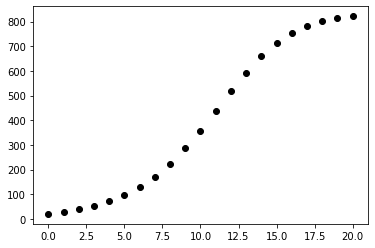

In [21]:
plp.plot(datos["tiempo"],datos["pob"],"ko")

In [22]:
plp.show()

In [23]:
import numpy as np

n=datos["tiempo"].values
print(n)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


In [24]:
p_n=datos["pob"].values

In [25]:
delta_pn=np.zeros(len(p_n)-1)
for i in range(len(p_n)-1):
    delta_pn[i]=p_n[i+1]-p_n[i] 

In [27]:
print(np.argmax(delta_pn))
print(p_n[np.argmax(delta_pn)])
print(p_n[np.argmax(delta_pn)+1])
print(p_n[0:10])
print(delta_pn[0:10])

11
436.4332260551016
516.7066705548234
[ 20.          27.68066988  37.99836305  51.96776983  70.77427663
  95.73613043 128.40361111 170.26201509 222.45855455 285.36610172]
[ 7.68066988 10.31769317 13.96940678 18.8065068  24.96185379 32.66748069
 41.85840398 52.19653946 62.90754716 72.35008051]


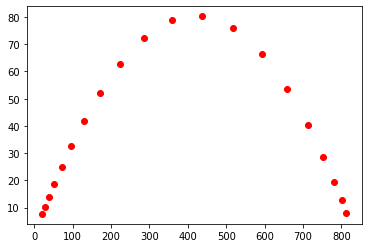

In [28]:
plp.plot(p_n[:-1],delta_pn,"ro")

In [29]:
plp.show()

where R is the intrinsic growth rate
$\Delta x_{(n)}=x_{(n)}R-x_{(n)}^2\frac{R}{K}$

The maximum value is obtained when $x_n=K/2$

$\Delta x^{'}_{(n)}=R-2x_{(n)}\frac{R}{K}$

$\Delta  x^{'}_{(n)}=0$

$x_{(n)}=K/2$

$\Delta x^{''}_{(n)}=-2\frac{R}{K}$

In [30]:
np.max(delta_pn)
print(delta_pn)

[ 7.68066988 10.31769317 13.96940678 18.8065068  24.96185379 32.66748069
 41.85840398 52.19653946 62.90754716 72.35008051 78.71704382 80.2734445
 75.88869668 66.28161988 53.55545824 40.30512765 28.56436158 19.37889949
 12.6920083   8.12951875]


In [31]:
k_max=2*p_n[np.argmax(delta_pn)+1]

In [32]:
k_min=np.max([p_n[-1],2*p_n[[np.argmax(delta_pn)]]])

In [33]:
print(k_min,' ',k_max)

[872.86645211]   1033.4133411096468


The growth rate function for the logistic model is

$\Delta r(x_{(n)})=x_{(n)}\frac{R}{K}(K-x_{(n)})$

redefine $y$ as

$y=x_{(n)}(1-\frac{x_{(n)}}{K})$
then:

$r(x_{(n)})=Ry$

## Procedure for approximating the values of $K$ y $R$

Se establece un rango para el valor de $K$

$K=\{K_{min},K_{max}\}$

The value of $\hat{K}$ is fixed as the interval middle point

$\hat{K}=\frac{K_{min}+K_{max}}{2}$

We compute the values of the variable

$y=x_{(n)}(\hat{K}-x_{(n)})$

We have the growth rate function

$r(x_{(n)})=Ry$

The estimated values of $K$ and $R$ are obtained using linear estimation. Depending on the results the values of $K_{min}$ and $K_{max}$ are updated, and the whole estimation process is redone.


In [34]:
k_est=(k_max+k_min)/2
print(k_est)

[953.13989661]


In [35]:
y=(1-p_n/k_est)*p_n

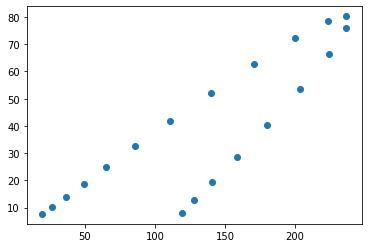

In [36]:
plp.scatter(y[0:-1],delta_pn)
plp.show()

In [37]:
y[0:-1]

array([ 19.58033443,  26.87678004,  36.48350086,  49.1343462 ,
        65.51901636,  86.12011634, 111.10553409, 139.84764057,
       170.53773089, 199.92868345, 223.46425606, 236.59481673,
       236.59481673, 224.16123651, 203.41511243, 179.91881226,
       158.26675521, 140.85795028, 128.07254191, 119.2718158 ])

In [38]:
A = np.column_stack((y[0:-1], np.ones(len(delta_pn))))

In [39]:
A

array([[ 19.58033443,   1.        ],
       [ 26.87678004,   1.        ],
       [ 36.48350086,   1.        ],
       [ 49.1343462 ,   1.        ],
       [ 65.51901636,   1.        ],
       [ 86.12011634,   1.        ],
       [111.10553409,   1.        ],
       [139.84764057,   1.        ],
       [170.53773089,   1.        ],
       [199.92868345,   1.        ],
       [223.46425606,   1.        ],
       [236.59481673,   1.        ],
       [236.59481673,   1.        ],
       [224.16123651,   1.        ],
       [203.41511243,   1.        ],
       [179.91881226,   1.        ],
       [158.26675521,   1.        ],
       [140.85795028,   1.        ],
       [128.07254191,   1.        ],
       [119.2718158 ,   1.        ]])

In [40]:
popt,res,rank,val= np.linalg.lstsq(A, delta_pn)

C:\Users\Tavo Bula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [41]:
m,c=popt
print(m,c)

0.3064401533496387 -2.148532109667542


In [42]:
delta_pn_est=m*y[0:-1]+c
delta_pn_est

array([ 3.85166858,  6.08759249,  9.03147749, 12.90820448, 17.92912531,
       24.24212955, 31.89866479, 40.70640031, 50.1110763 , 59.11764431,
       66.32988879, 70.35361981, 70.35361981, 66.54347158, 60.18602614,
       52.98581631, 46.35075663, 41.01599978, 37.09803727, 34.40114141])

In [43]:
delta_pn

array([ 7.68066988, 10.31769317, 13.96940678, 18.8065068 , 24.96185379,
       32.66748069, 41.85840398, 52.19653946, 62.90754716, 72.35008051,
       78.71704382, 80.2734445 , 75.88869668, 66.28161988, 53.55545824,
       40.30512765, 28.56436158, 19.37889949, 12.6920083 ,  8.12951875])

In [45]:
print(sum((delta_pn-delta_pn_est)*(delta_pn-delta_pn_est)))
print(np.max(np.abs((delta_pn-delta_pn_est))))

3339.92750207057
26.27162266127455


In [46]:
if (c<0):
    k_max=k_est
else:
    k_min=k_est

In [47]:
k_min, k_max

(array([872.86645211]), array([953.13989661]))

In [48]:
res

array([3339.92750207])

In [49]:
sum((A.dot(popt)-delta_pn)**2)

3339.92750207057

In [50]:
pob_est=np.zeros(len(p_n))

In [51]:
pob_est[0]=p_n[0]

In [52]:
for i in range(1,len(p_n)):
    pob_est[i]=pob_est[i-1]+m*(1-pob_est[i-1]/k_est)*pob_est[i-1]

In [53]:
pob_est

array([ 20.        ,  26.00020068,  33.75036479,  43.72660846,
        56.51147243,  72.80211249,  93.40757399, 119.2262739 ,
       151.19181513, 190.17376477, 236.82303847, 291.36341645,
       353.35537697, 421.49441203, 493.53926731, 566.46677119,
       636.88862452, 701.64533741, 758.37827347, 805.86566234,
       844.02303352])

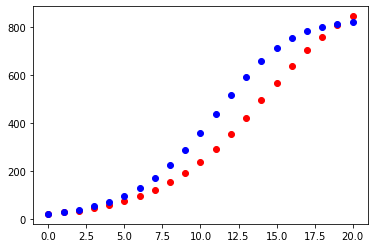

In [55]:
plp.plot(n,pob_est,"ro")
plp.plot(n,p_n,"bo")

In [56]:
plp.show()

In [57]:
np.sum((p_n-pob_est)*(p_n-pob_est))

181169.40250429837

In [58]:
np.max(np.abs(p_n-pob_est))

171.10095519601094

In [60]:
print(k_est, m)

[953.13989661] 0.3064401533496387


In [61]:
delta_pn

array([ 7.68066988, 10.31769317, 13.96940678, 18.8065068 , 24.96185379,
       32.66748069, 41.85840398, 52.19653946, 62.90754716, 72.35008051,
       78.71704382, 80.2734445 , 75.88869668, 66.28161988, 53.55545824,
       40.30512765, 28.56436158, 19.37889949, 12.6920083 ,  8.12951875])

In [62]:
y

array([ 19.58033443,  26.87678004,  36.48350086,  49.1343462 ,
        65.51901636,  86.12011634, 111.10553409, 139.84764057,
       170.53773089, 199.92868345, 223.46425606, 236.59481673,
       236.59481673, 224.16123651, 203.41511243, 179.91881226,
       158.26675521, 140.85795028, 128.07254191, 119.2718158 ,
       113.45716049])

In [63]:
np.sum(delta_pn*y[:-1])

140840.01803709168

In [64]:
r_est=np.sum(delta_pn*y[:-1])/np.sum(y[:-1]*y[:-1])
r_est

0.2940773365892447

In [65]:
k_est

array([953.13989661])

In [66]:
delta_pn

array([ 7.68066988, 10.31769317, 13.96940678, 18.8065068 , 24.96185379,
       32.66748069, 41.85840398, 52.19653946, 62.90754716, 72.35008051,
       78.71704382, 80.2734445 , 75.88869668, 66.28161988, 53.55545824,
       40.30512765, 28.56436158, 19.37889949, 12.6920083 ,  8.12951875])

In [67]:
delta_pn_est=y*m+c
delta_pn_est

array([ 3.85166858,  6.08759249,  9.03147749, 12.90820448, 17.92912531,
       24.24212955, 31.89866479, 40.70640031, 50.1110763 , 59.11764431,
       66.32988879, 70.35361981, 70.35361981, 66.54347158, 60.18602614,
       52.98581631, 46.35075663, 41.01599978, 37.09803727, 34.40114141,
       32.61929755])

In [68]:
#xA=np.concatenate((x,-1*x),axis=0)
wA=np.ones(len(delta_pn)*2)*-1
yA=np.concatenate((y[0:-1]*-1,y[0:-1]),axis=0)
delta_pnA=np.concatenate((delta_pn*-1,delta_pn),axis=0)
cA=np.concatenate((np.ones(len(delta_pn))*-1,np.ones(len(delta_pn))),axis=0)
A2=np.column_stack((wA,yA,cA))
A2

array([[  -1.        ,  -19.58033443,   -1.        ],
       [  -1.        ,  -26.87678004,   -1.        ],
       [  -1.        ,  -36.48350086,   -1.        ],
       [  -1.        ,  -49.1343462 ,   -1.        ],
       [  -1.        ,  -65.51901636,   -1.        ],
       [  -1.        ,  -86.12011634,   -1.        ],
       [  -1.        , -111.10553409,   -1.        ],
       [  -1.        , -139.84764057,   -1.        ],
       [  -1.        , -170.53773089,   -1.        ],
       [  -1.        , -199.92868345,   -1.        ],
       [  -1.        , -223.46425606,   -1.        ],
       [  -1.        , -236.59481673,   -1.        ],
       [  -1.        , -236.59481673,   -1.        ],
       [  -1.        , -224.16123651,   -1.        ],
       [  -1.        , -203.41511243,   -1.        ],
       [  -1.        , -179.91881226,   -1.        ],
       [  -1.        , -158.26675521,   -1.        ],
       [  -1.        , -140.85795028,   -1.        ],
       [  -1.        , -128.

In [69]:
from scipy.optimize import linprog

In [0]:
w_bnds = (0, None)
m_bnds = (None, None)
c_bnds = (None, None)

res = linprog((1,0,0), A2, delta_pnA,bounds=(w_bnds,m_bnds,c_bnds))

In [0]:
res.x

array([ 18.33309152,   0.35968608, -16.43780105])

In [0]:
delta_pn_est2=y[0:-1]*res.x[1]+res.x[2]

In [0]:
np.sum((delta_pn-delta_pn_est2)*(delta_pn-delta_pn_est2))

4587.9944589528022

In [0]:
pob_est2=np.zeros(len(p_n))
pob_est2[0]=p_n[0]
for i in range(1,len(p_n)):
    pob_est2[i]=pob_est2[i-1]+res.x[1]*(1-pob_est2[i-1]/k_est)*pob_est2[i-1]

In [0]:
np.sum((p_n-pob_est2)*(p_n-pob_est2))

32795.140541780449

In [0]:
np.max(np.abs(p_n-pob_est2))

96.688153552103472